# HW2 Problem 3 by Anthony Hevia

## Loading and processing the CIFAR10 data set

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import optimizers, layers, models
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Sources used: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
# ConvNets from Wocjan's notes were also used

# Goodfit model

## Build and train the model

In [42]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

opt = optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(
    optimizer=opt, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

epochs = 20
history = model.fit(
    train_images, 
    train_labels, 
    epochs=epochs, 
    batch_size=64,
    verbose=1,
    validation_data=(test_images, test_labels)
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 190us/step - loss: 1.8579 - acc: 0.3173 - val_loss: 1.5530 - val_acc: 0.4315
Epoch 2/20
50000/50000 [==============================] - 8s 163us/step - loss: 1.5113 - acc: 0.4492 - val_loss: 1.4371 - val_acc: 0.4736
Epoch 3/20
50000/50000 [==============================] - 8s 162us/step - loss: 1.3703 - acc: 0.5023 - val_loss: 1.2743 - val_acc: 0.5491
Epoch 4/20
50000/50000 [==============================] - 8s 162us/step - loss: 1.2711 - acc: 0.5430 - val_loss: 1.1797 - val_acc: 0.5746
Epoch 5/20
50000/50000 [==============================] - 8s 161us/step - loss: 1.1805 - acc: 0.5780 - val_loss: 1.0796 - val_acc: 0.6168
Epoch 6/20
50000/50000 [==============================] - 8s 162us/step - loss: 1.1036 - acc: 0.6069 - val_loss: 1.0816 - val_acc: 0.6126
Epoch 7/20
50000/50000 [==============================] - 8s 163us/step - loss: 1.0350 - acc: 0.6326 - val_loss: 0.9872 -

## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

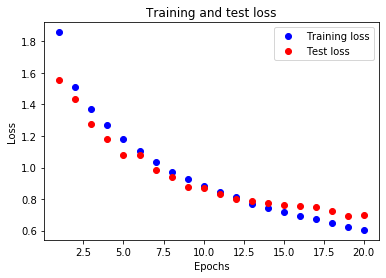

In [44]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

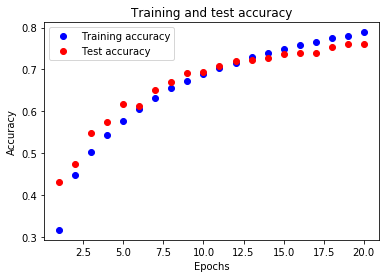

In [46]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Overfit model

## Build and train the model

In [7]:
model_overfit = models.Sequential()
model_overfit.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_overfit.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_overfit.add(layers.MaxPooling2D((2, 2)))
model_overfit.add(layers.Flatten())
model_overfit.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_overfit.add(layers.Dense(10, activation='softmax'))

opt = optimizers.SGD(lr=0.001, momentum=0.9)
model_overfit.compile(
    optimizer=opt, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

epochs = 20
history_overfit = model_overfit.fit(
    train_images, 
    train_labels, 
    epochs=epochs, 
    batch_size=64, 
    validation_data=(test_images, test_labels)
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 120us/step - loss: 1.7749 - acc: 0.3633 - val_loss: 1.5871 - val_acc: 0.4329
Epoch 2/20
50000/50000 [==============================] - 6s 110us/step - loss: 1.4480 - acc: 0.4865 - val_loss: 1.3436 - val_acc: 0.5257
Epoch 3/20
50000/50000 [==============================] - 6s 110us/step - loss: 1.2941 - acc: 0.5429 - val_loss: 1.2355 - val_acc: 0.5633
Epoch 4/20
50000/50000 [==============================] - 6s 110us/step - loss: 1.1820 - acc: 0.5860 - val_loss: 1.1571 - val_acc: 0.5899
Epoch 5/20
50000/50000 [==============================] - 5s 109us/step - loss: 1.0919 - acc: 0.6172 - val_loss: 1.1279 - val_acc: 0.6017
Epoch 6/20
50000/50000 [==============================] - 6s 110us/step - loss: 1.0192 - acc: 0.6430 - val_loss: 1.0731 - val_acc: 0.6206
Epoch 7/20
50000/50000 [==============================] - 5s 108us/step - loss: 0.9582 - acc: 0.6674 - val_loss: 1.0193 - 

## Training/test loss/accuracy during training

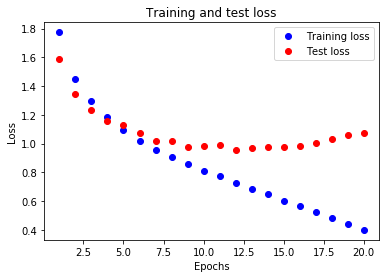

In [8]:
history_dict_overfit = history_overfit.history
loss_values_overfit = history_dict_overfit['loss']
test_loss_values_overfit = history_dict_overfit['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values_overfit, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values_overfit, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

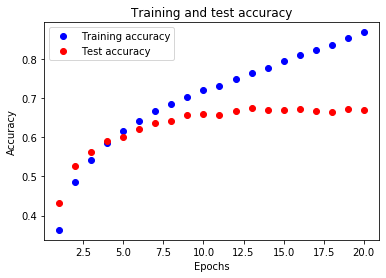

In [9]:
acc_values_overfit = history_dict_overfit['acc']
test_acc_values_overfit = history_dict_overfit['val_acc']
plt.plot(epochs_range, acc_values_overfit, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values_overfit, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Underfit Model

## Build and train the model

In [10]:
model_underfit = models.Sequential()
model_underfit.add(layers.Conv2D(64, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_underfit.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_underfit.add(layers.MaxPooling2D((2, 2)))
model_underfit.add(layers.Flatten())
model_underfit.add(layers.Dropout(0.95))
model_underfit.add(layers.Dense(32, activation='sigmoid', kernel_initializer='he_uniform'))
model_underfit.add(layers.Dense(10, activation='softmax'))

opt = optimizers.SGD(lr=0.001, momentum=0.9)
model_underfit.compile(
    optimizer=opt, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

epochs = 15
history_underfit = model_underfit.fit(
    train_images, 
    train_labels, 
    epochs=epochs, 
    batch_size=64, 
    validation_data=(test_images, test_labels)
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 8s 157us/step - loss: 2.1430 - acc: 0.2049 - val_loss: 1.9455 - val_acc: 0.3250
Epoch 2/15
50000/50000 [==============================] - 7s 148us/step - loss: 1.9206 - acc: 0.3096 - val_loss: 1.7686 - val_acc: 0.3955
Epoch 3/15
50000/50000 [==============================] - 7s 147us/step - loss: 1.7967 - acc: 0.3603 - val_loss: 1.6757 - val_acc: 0.4173
Epoch 4/15
50000/50000 [==============================] - 7s 147us/step - loss: 1.7208 - acc: 0.3818 - val_loss: 1.5888 - val_acc: 0.4464
Epoch 5/15
50000/50000 [==============================] - 7s 147us/step - loss: 1.6613 - acc: 0.3996 - val_loss: 1.5477 - val_acc: 0.4502
Epoch 6/15
50000/50000 [==============================] - 7s 146us/step - loss: 1.6152 - acc: 0.4154 - val_loss: 1.4875 - val_acc: 0.4789
Epoch 7/15
50000/50000 [==============================] - 7s 147us/step - loss: 1.5811 - acc: 0.4271 - val_loss: 1.4403 - 

## Training/test loss/accuracy during training

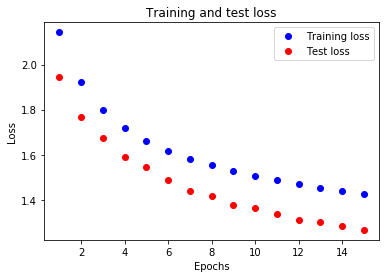

In [11]:
history_dict_underfit = history_underfit.history
loss_values_underfit = history_dict_underfit['loss']
test_loss_values_underfit = history_dict_underfit['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values_underfit, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values_underfit, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

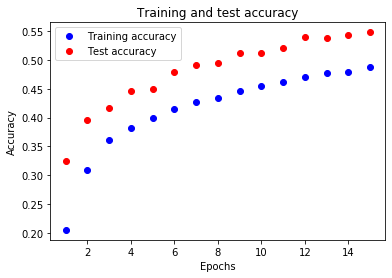

In [12]:
acc_values_underfit = history_dict_underfit['acc']
test_acc_values_underfit = history_dict_underfit['val_acc']
plt.plot(epochs_range, acc_values_underfit, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values_underfit, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()